In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_animes = pd.read_parquet("../../data/processed/animes_processed.parquet")
df_animes.head(10)

,uid,title,synopsis,aired,episodes,members,popularity,score,genres_list,genre_action,...,genre_emb_40,genre_emb_41,genre_emb_42,genre_emb_43,genre_emb_44,genre_emb_45,genre_emb_46,genre_emb_47,genre_emb_48,genre_emb_49
0,28891,Haikyuu!! Second Season,Following their participation at the Inter-Hig...,"Oct 4, 2015 to Mar 27, 2016",25,489888,141,8.82,"[Comedy, Sports, Drama, School, Shounen]",0,...,-0.325108,0.372583,-0.150133,0.063334,-0.037451,-0.023057,-0.015965,-0.079849,0.069605,0.041172
1,23273,Shigatsu wa Kimi no Uso,Music accompanies the path of the human metron...,"Oct 10, 2014 to Mar 20, 2015",22,995473,28,8.83,"[Drama, Music, Romance, School, Shounen]",0,...,0.039412,0.307161,0.010229,0.095036,0.020471,-0.112495,-0.233364,-0.223070,-0.094668,0.010424
2,34599,Made in Abyss,The Abyss—a gaping chasm stretching down into ...,"Jul 7, 2017 to Sep 29, 2017",13,581663,98,8.83,"[Sci-Fi, Adventure, Mystery, Drama, Fantasy]",0,...,0.241236,-0.047506,0.017787,0.183756,0.471296,0.002649,0.130329,-0.239705,-0.322175,-0.608473
3,5114,Fullmetal Alchemist: Brotherhood,"""In order for something to be obtained, someth...","Apr 5, 2009 to Jul 4, 2010",64,1615084,4,9.23,"[Action, Military, Adventure, Comedy, Drama, M...",1,...,-0.031031,0.094117,0.084010,-0.000744,0.322104,-0.150647,-0.061140,-0.264919,-0.225668,-0.001621
4,31758,Kizumonogatari III: Reiketsu-hen,After helping revive the legendary vampire Kis...,"Jan 6, 2017",1,214621,502,8.83,"[Action, Mystery, Supernatural, Vampire]",1,...,0.085453,-0.016847,-0.015368,0.250852,0.117892,-0.276332,0.251657,-0.217527,-0.120232,-0.557234
5,37510,Mob Psycho 100 II,"Shigeo ""Mob"" Kageyama is now maturing and unde...","Jan 7, 2019 to Apr 1, 2019",13,442310,176,8.89,"[Action, Slice of Life, Comedy, Supernatural]",1,...,-0.037127,0.159679,0.233275,-0.244771,0.012024,-0.248264,-0.020235,-0.000815,0.010380,0.002741
6,199,Sen to Chihiro no Kamikakushi,"Stubborn, spoiled, and naïve, 10-year-old Chih...","Jul 20, 2001",1,913212,40,8.90,"[Adventure, Supernatural, Drama]",0,...,0.107310,0.132151,0.278707,0.159719,0.402134,-0.485785,0.263917,-0.151865,-0.420217,0.223778
7,38000,Kimetsu no Yaiba,"Ever since the death of his father, the burden...","Apr 6, 2019 to Sep 28, 2019",26,575037,106,8.92,"[Action, Demons, Historical, Shounen, Supernat...",1,...,0.113221,-0.099797,0.018980,0.003247,0.450094,-0.027240,-0.082962,-0.213881,-0.170457,-0.145498
8,35247,Owarimonogatari 2nd Season,Following an encounter with oddity specialist ...,"Aug 12, 2017 to Aug 13, 2017",7,189944,573,8.93,"[Mystery, Comedy, Supernatural, Vampire]",0,...,-0.078951,0.052401,0.011987,0.156864,-0.289549,-0.147272,0.334582,-0.114548,-0.035374,-0.252579
9,2904,Code Geass: Hangyaku no Lelouch R2,"One year has passed since the Black Rebellion,...","Apr 6, 2008 to Sep 28, 2008",25,992196,27,8.93,"[Action, Military, Sci-Fi, Super Power, Drama,...",1,...,-0.105253,0.141387,0.301835,0.080078,0.368225,-0.211279,0.091863,-0.211304,-0.288166,-0.188470


In [3]:
# Set seaborn theme for consistent styling across plots
sns.set_theme(context="notebook", style="whitegrid")

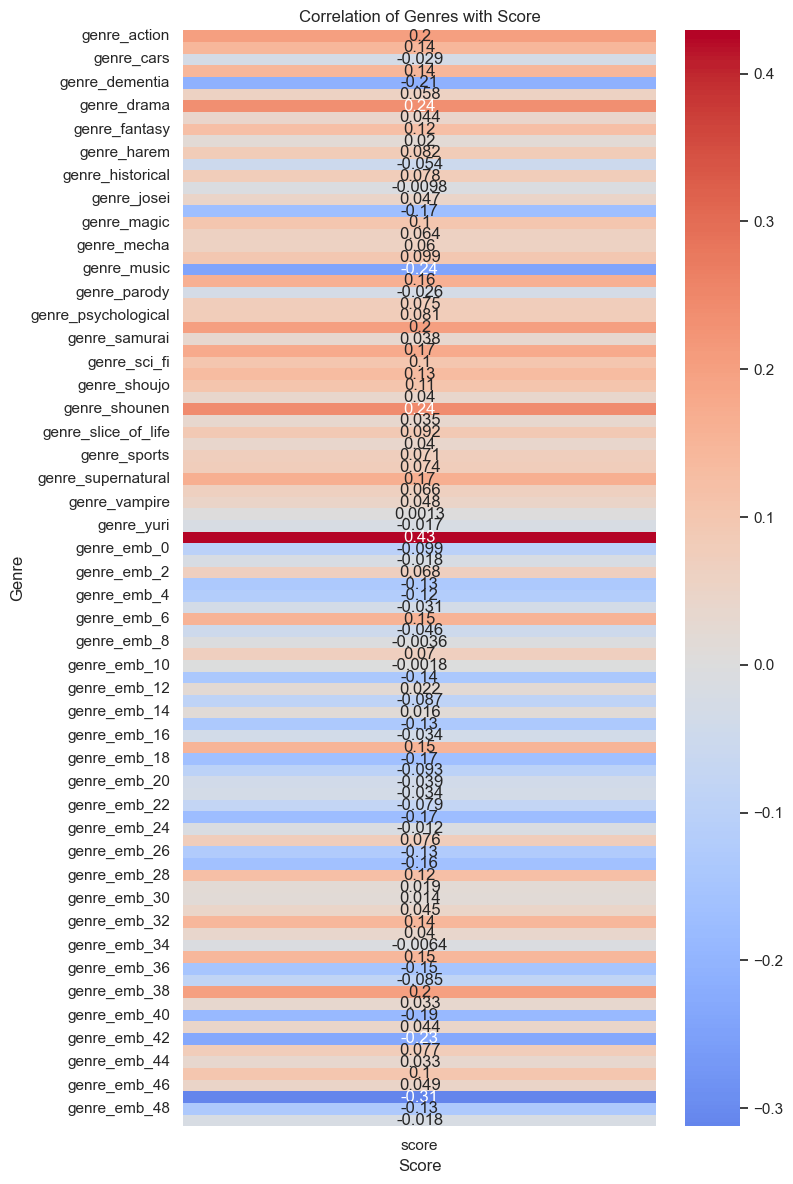

In [4]:
genre_cols = [c for c in df_animes.columns if c.startswith('genre_')]

corr_scores = df_animes[genre_cols + ['score']].corr()['score'].drop('score')

# Строим heatmap
plt.figure(figsize=(8, 12))
sns.heatmap(corr_scores.to_frame(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation of Genres with Score')
plt.xlabel('Score')
plt.ylabel('Genre')
plt.tight_layout()
plt.show()